In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def read_msd(folder_path: str, sample_name: str):
    """
    takes path to folder containing CSV files with columns 'time' and 'MSD'
    returns dictionary with sample names as keys and dataframes (time, MSD) as values
    """
    # Initialize an empty dictionary to store the DataFrames
    data_dict = {}

    # List all files in the specified folder
    files = os.listdir(folder_path)

    # Iterate through each file in the folder
    for i, file_name in enumerate(files):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        df = pd.read_csv(file_path)
        
        # Extract 'time' and 'MSD' columns and filter by time <= 1 second
        df = df[['time', 'MSD']]
        df = df[df['time'] <= 1]
        
        # Construct the key for the dictionary
        dict_key = f'{sample_name}_{i + 1}'
        
        # Add the DataFrame to the dictionary
        data_dict[dict_key] = df

    return data_dict

# Function to perform linear regression through the origin
def linear_regression_through_origin(df):
    X = df['time'].values
    y = df['MSD'].values
    slope = np.sum(X * y) / np.sum(X ** 2)
    return slope
def fit_msd(data_dict: dict):
    results = []
    # Perform linear regression for each sample
    for sample_name, df in data_dict.items():
        slope = linear_regression_through_origin(df)
        results.append({'Sample': sample_name, 'Slope': slope})

    # Convert results to a dataframe
    fit_results = pd.DataFrame(results)
    return fit_results

# Plotting MSD vs time for each DataFrame in the dictionary
def plot_msd(data_dict: dict):
    plt.figure(figsize=(12, 8))

    for key, df in data_dict.items():
        plt.scatter(df['time'], df['MSD'], label=key)

    plt.xlabel('Time')
    plt.ylabel('MSD')
    plt.title('MSD vs Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_msd_fit(data_dict: dict, results_df):
    # Plot MSD vs. time with fit lines
    plt.figure(figsize=(12, 8))
    for sample_name, df in data_dict.items():
        slope = results_df[results_df['Sample'] == sample_name]['Slope'].values[0]
        color = next(plt.gca()._get_lines.prop_cycler)['color']  # Get the next color from the color cycle
        plt.plot(df['time'], df['MSD'], 'o', label=f'{sample_name}', color=color)
        plt.plot(df['time'], slope * df['time'], '-', color = color)

    plt.xlabel('Time')
    plt.ylabel('MSD')
    plt.legend()
    plt.grid(True)
    plt.title('MSD vs. Time with Linear Fit')
    plt.show()


In [3]:
dict_2p5_Apr5 = read_msd('MSD/2p5_Apr5', '2p5_Apr5')
dict_2p5_HA_Apr5 = read_msd('MSD/2p5_HA_Apr5', '2p5_HA_Apr5')
dict_2p5_Mar22 = read_msd('MSD/2p5_Mar22', '2p5_Mar22')
dict_2p5_HA_Mar6 = read_msd('MSD/2p5_HA_Mar6', '2p5_HA_Mar6')

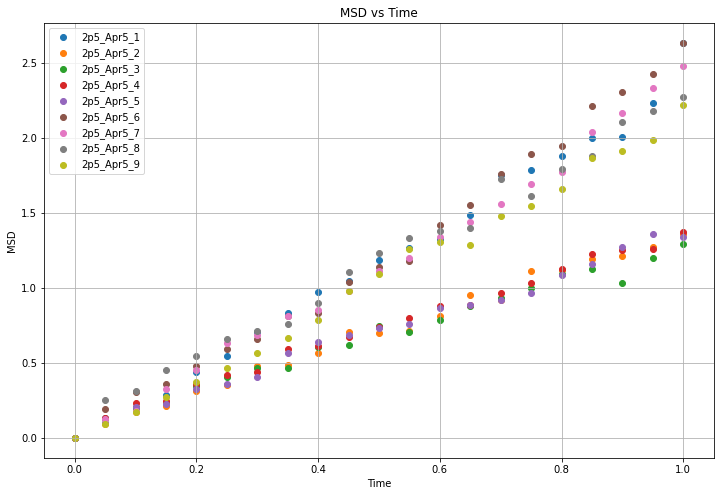

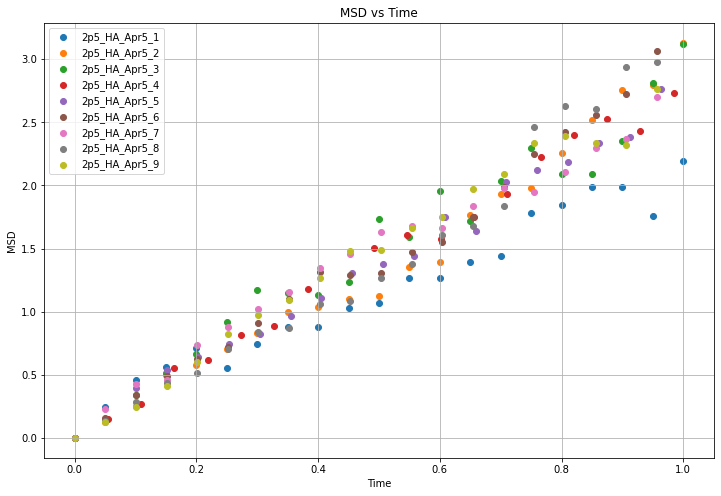

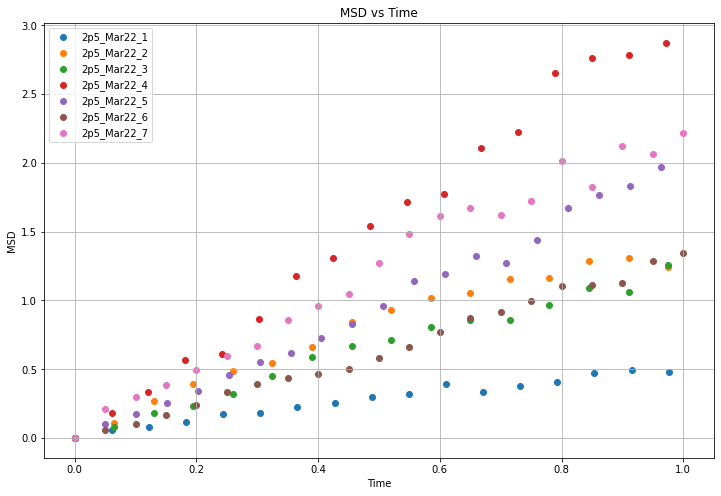

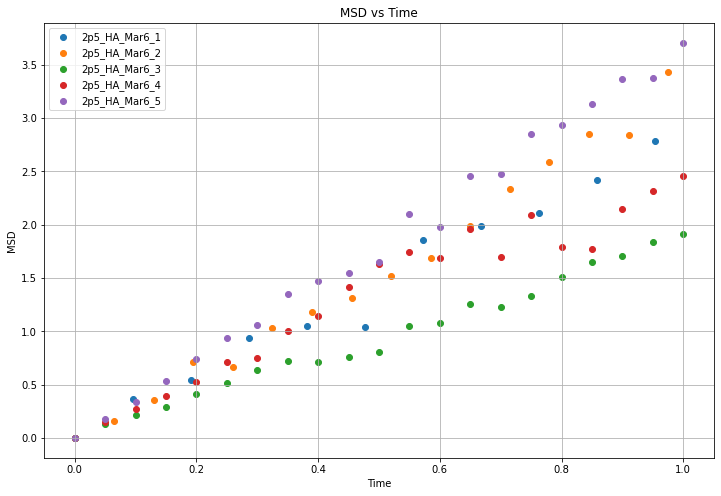

In [4]:
plot_msd(dict_2p5_Apr5)
plot_msd(dict_2p5_HA_Apr5)
plot_msd(dict_2p5_Mar22)
plot_msd(dict_2p5_HA_Mar6)

In [5]:
results_2p5_Apr5 = fit_msd(dict_2p5_Apr5)
results_2p5_HA_Apr5 = fit_msd(dict_2p5_HA_Apr5)
results_2p5_Mar22 = fit_msd(dict_2p5_Mar22)
results_2p5_HA_Mar6 = fit_msd(dict_2p5_HA_Mar6)

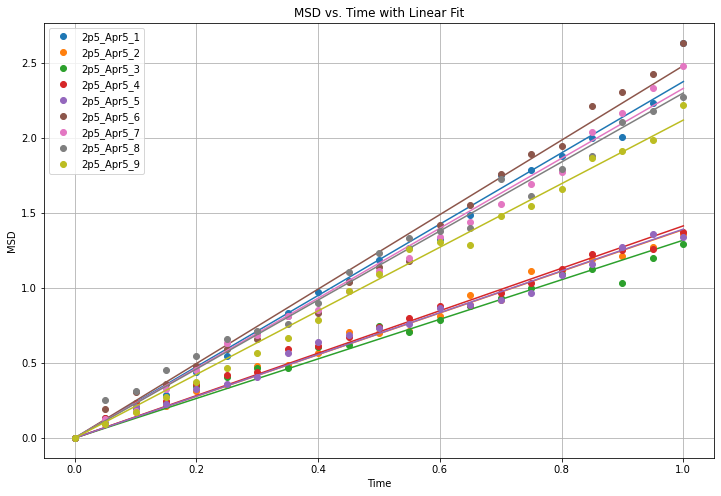

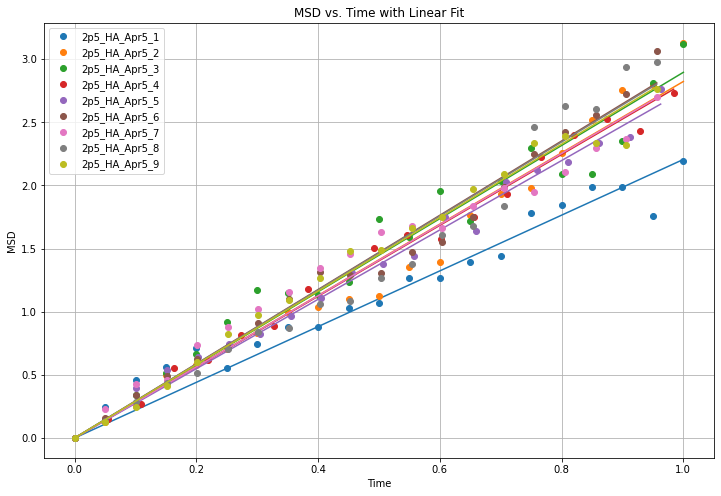

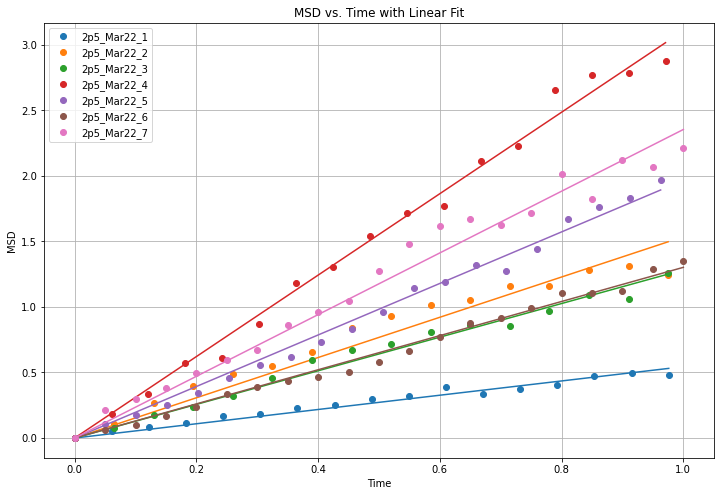

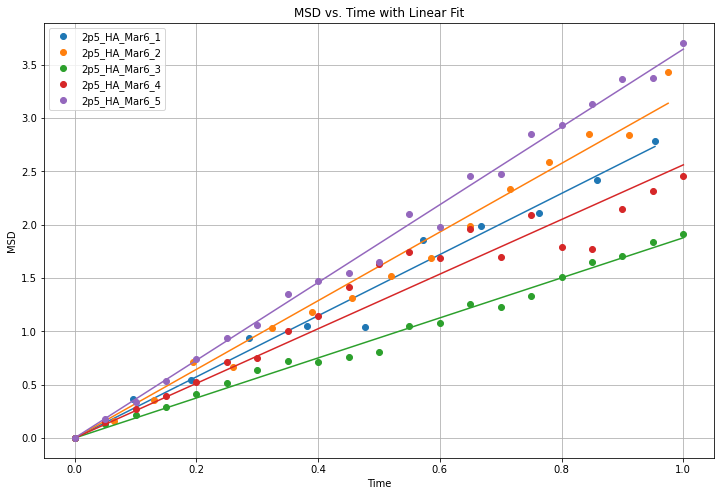

In [6]:
plot_msd_fit(dict_2p5_Apr5, results_2p5_Apr5)
plot_msd_fit(dict_2p5_HA_Apr5, results_2p5_HA_Apr5)
plot_msd_fit(dict_2p5_Mar22, results_2p5_Mar22)
plot_msd_fit(dict_2p5_HA_Mar6, results_2p5_HA_Mar6)

In [7]:
# Display the results dataframe
display(fit_msd(dict_2p5_Apr5))
display(fit_msd(dict_2p5_HA_Apr5))
display(fit_msd(dict_2p5_Mar22))
display(fit_msd(dict_2p5_HA_Mar6))

,Sample,Slope
0,2p5_Apr5_1,2.376038
1,2p5_Apr5_2,1.389220
2,2p5_Apr5_3,1.318843
3,2p5_Apr5_4,1.414187
4,2p5_Apr5_5,1.392491
5,2p5_Apr5_6,2.481828
6,2p5_Apr5_7,2.330734
7,2p5_Apr5_8,2.299894
8,2p5_Apr5_9,2.119475


,Sample,Slope
0,2p5_HA_Apr5_1,2.206252
1,2p5_HA_Apr5_2,2.823622
2,2p5_HA_Apr5_3,2.896188
3,2p5_HA_Apr5_4,2.807325
4,2p5_HA_Apr5_5,2.746888
5,2p5_HA_Apr5_6,2.940526
6,2p5_HA_Apr5_7,2.817080
7,2p5_HA_Apr5_8,2.930545
8,2p5_HA_Apr5_9,2.909044


,Sample,Slope
0,2p5_Mar22_1,0.544287
1,2p5_Mar22_2,1.535285
2,2p5_Mar22_3,1.282424
3,2p5_Mar22_4,3.106489
4,2p5_Mar22_5,1.965351
5,2p5_Mar22_6,1.301931
6,2p5_Mar22_7,2.353413


,Sample,Slope
0,2p5_HA_Mar6_1,2.867027
1,2p5_HA_Mar6_2,3.218925
2,2p5_HA_Mar6_3,1.877556
3,2p5_HA_Mar6_4,2.561279
4,2p5_HA_Mar6_5,3.646038


In [8]:
results_2p5_Apr5['diffcoeff']=results_2p5_Apr5['Slope']/4
results_2p5_HA_Apr5['diffcoeff']=results_2p5_HA_Apr5['Slope']/4
results_2p5_Mar22['diffcoeff']=results_2p5_Mar22['Slope']/4
results_2p5_HA_Mar6['diffcoeff']=results_2p5_HA_Mar6['Slope']/4

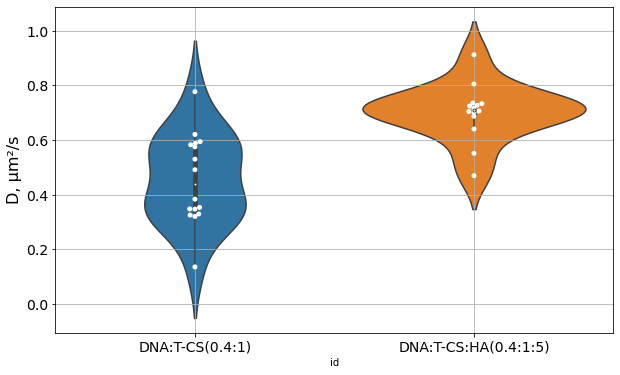

In [9]:
# Add a column to distinguish between the two dataframes
results_2p5_Apr5['Source'] = 'results_2p5_Apr5'
results_2p5_HA_Apr5['Source'] = 'results_2p5_HA_Apr5'
results_2p5_Mar22['Source'] = 'results_2p5_Mar22'
results_2p5_HA_Mar6['Source'] = 'results_2p5_HA_Mar6'
#results_2p5_Apr5['id'] = '2p5'
#results_2p5_HA_Apr5['id'] = '2p5_HA'
#results_2p5_Mar22['id'] = '2p5'
#results_2p5_HA_Mar6['id'] = '2p5_HA'
results_2p5_Apr5['id'] = 'DNA:T-CS(0.4:1)'
results_2p5_HA_Apr5['id'] = 'DNA:T-CS:HA(0.4:1:5)'
results_2p5_Mar22['id'] = 'DNA:T-CS(0.4:1)'
results_2p5_HA_Mar6['id'] = 'DNA:T-CS:HA(0.4:1:5)'
# Combine the dataframes
combined_df = pd.concat([results_2p5_Apr5, results_2p5_HA_Apr5, results_2p5_Mar22, results_2p5_HA_Mar6])

# Plotting
plt.figure(figsize=(10, 6))
sns.swarmplot(x='id', y='diffcoeff', data=combined_df, color='white')
sns.violinplot(x='id', y='diffcoeff', data=combined_df)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('D, µm²/s', fontsize=16)
plt.grid(True)
plt.savefig('output/diffcoeff.png', facecolor='white')

In [ ]:
combined_df